## 6.4高斯过程

先回顾高斯分布相关知识，高斯分布，又叫正态分布，是连续变量经常使用的一个分布模型，一维的高斯分布如下：

$$
\mathcal{N}\left(x\left|~\mu,\sigma^2\right.\right) = \frac{1}{(2\pi\sigma^2)^{1/2}} \exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}
$$

其中 $\mu$ 是均值，$\sigma$ 是方差。

$D$-维的高斯分布如下：

$$
\mathcal{N}\left(\mathbf x\left|~\mathbf{\mu, \Sigma}\right.\right) = \frac{1}{(2\pi)^{D/2}} \frac{1}{|\mathbf\Sigma|^{1/2}} \exp \left\{-\frac{1}{2}(\mathbf x - \mathbf \mu)^\top\mathbf\Sigma^{-1}(\mathbf x - \mathbf \mu)\right\}
$$

其中，$D$ 维向量 $\mathbf \mu$ 是均值，$D\times D$ 矩阵 $\mathbf\Sigma$ 是方差，$|\mathbf\Sigma|$ 是其行列式。

之前我们已经看到，在均值和方差固定时，高斯函数是熵最大的连续分布，因此高斯分布的应用十分广泛。

而中心极限定理告诉我们，对于某个分布一组样本 $x_1, \dots, x_N$，他们的均值 $(x_1+\dots+x_N)/N$ 的分布会随着 $N$ 的增大而越来越接近一个高斯分布。

高斯过程就是就是一系列关于连续域（时间或空间）的随机变量的联合(服从多元高斯分布)，而且针对每一个时间或是空间点上的随机变量都是服从高斯分布(但其参数与时间或空间有关)的。[帮助理解高斯过程](https://www.cnblogs.com/hxsyl/p/5229746.html)

+ 一个高斯过程可以被均值和协方差共同唯一决定，均值描述了样本出现的整体位置，一般设置为0，但可也可以设置为线性函数。

+ 协方差反映了输入数据点之间的相似性度量，引入核函数来计算相似性。


假定一个没有噪声的高斯回归
+ 目标是对$f:\mathbb{R}\rightarrow \mathbb R$建模
+ $x=[x_1,...,x_N]^T,y=[y_1,...y_N]^T$
+ 预测f在某些未知输入$x*$上的值

$$\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}\sim \mathcal N\bigg(\begin{pmatrix}
0\\
0
\end{pmatrix}，\begin{pmatrix}
1& 0\\
0& 1
\end{pmatrix}\bigg) $$

In [1]:
import sys
sys.path.append(r"../")
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

from prml.kernel import (
    PolynomialKernel,
    RBF,
    GaussianProcessClassifier,
    GaussianProcessRegressor
)
%matplotlib inline

如下图，每次从分布中抽取10个点，依次次赋予$X\in [0,1]$中的10个点(空间点或时间点),重复10次就得到了下图。

In [2]:
def plot_unit_gaussian_samples(D):
    xs = np.linspace(0, 1, D)
    fig=plt.figure(figsize=(8,6))
    for i in range(10):
        ys = np.random.multivariate_normal(np.arange(D), np.eye(D))
        plt.plot(xs,ys,lw=1)
    return 

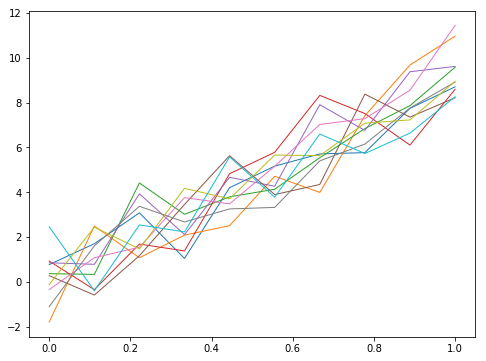

In [3]:
plot_unit_gaussian_samples(10)

## 6.4.1 重新考虑线性回归

考虑⼀个模型M，它被定义为由向量ϕ(x)的元素给出的M个固定基函数的线性组合，即$$y(x)=w^T\phi(x)$$
考虑w上的一个先验分布:$$p(w)=\mathcal N(w|0,\alpha ^{-1}I)$$其中$\alpha$为超参数，代表精度。记函数值的集合记作向量$\mathbf{y}$,$\mathbf y=\Phi w$

y是由w的元素给出的服从⾼斯分布的变量的线性组合，因此它本⾝是服从⾼斯分布,其均值为0方差为$$cov[\mathbf y]=\mathbb E[\mathbf{yy^T}]=\Phi\mathbb E[ww^T]\Phi^T=\frac{1}{\alpha}\Phi\Phi^T=K$$
⾼斯过程的确定通过给定两个x处的函数值y(x)的协⽅差来完成。这个协⽅差由核函数确定:
$$\mathbb E[y(x_n)y(x_m)]=k(x_n,x_m)$$

## 6.4.2 用于回归的高斯过程

已知的输入向量$x=[x_1,...x_N]$,预测$x_{N+1}$处的$t_{N+1}$
$$t_n=y_n+\epsilon_n$$
$$p(t_n|y_n)=\mathcal N(t_n|y_n,\beta^{-1})$$
目标值$t=(t_1,...,t_N)^T$的联合概率分布时一个各向同性的高斯分布
$$p(t|y)=\mathcal N(t|y,\beta^{-1}I_N)$$
边缘概率分布$$p(y)=\mathcal N(y|0,K)$$
为了找到一输入值$x_1,...,x_N$为条件的边缘概率分布$p(t)$需要对y积分：$$p(t)=\int{p(t|y)p(y)dy}=\mathcal N(t|0,C)$$

已知：

$$
\begin{align}
p(\mathbf x)&=\mathcal N(\mathbf x~|~\mathbf \mu, \mathbf \Lambda^{-1}) \\
p(\mathbf y|\mathbf x)&=\mathcal N(\mathbf y~|~\mathbf{Ax+b}, \mathbf L^{-1}) \\
\end{align}
$$

我们有

$$
\begin{align}
p(\mathbf y)&=\mathcal N(\mathbf y~|~\mathbf{A\mu+b}, \mathbf L^{-1}+\mathbf A\mathbf \Lambda^{-1}\mathbf A^\top) \\
p(\mathbf x|\mathbf y)&=\mathcal N(\mathbf y~|~\mathbf \Sigma\left\{ \mathbf A^\top \mathbf{L(y-b)} + \mathbf{\Lambda\mu} \right\}, \mathbf \Sigma) \\
\end{align}
$$

其中 $\mathbf \Sigma = (\mathbf\Lambda + \mathbf A^\top\mathbf L\mathbf A)^{-1}$。

协方差矩阵$$C=(x_n，x_m)=k(x_n,x_m)+\beta^{-1}\delta_{nm}$$

接着计算预测分布$p(t_{N+1}|\mathbf t_N)$,先找到联合概率分布$p(\mathbf t_{N+1})=\mathcal N(\mathbf t_{N+1}|0,C_{N+1})$
$$C_{N+1}=\begin{pmatrix}C_N&k\\k^T&c\end{pmatrix}$$
其中$k=k(x_n,x_{N+1})$,n,m=1,...,N$,c=k(x_{N+1},x_{N+1})+\beta^{-1}$,
$p(t_N+1|\mathbf t_N)$也为高斯分布,
均值为$$m(x_{N+1})=k^TC_N^{-1}t$$
方差为$$\sigma^2(x_{N+1})=c-k^TC_N^{-1}k$$

回到例子，我们用Sqared Exponential kernel来定义来计算协方差矩阵$$k(x,x')=exp(-\frac{(x-x')^2}{2})$$

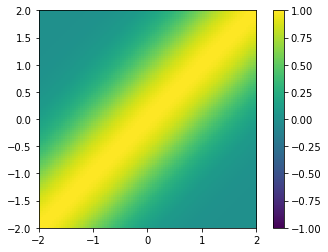

In [4]:
def k(xs,ys,sigma=1,l=1):
    dx=np.expand_dims(xs,1)-np.expand_dims(ys,0)
    return (sigma**2)*np.exp(-((dx)**2)/2)
def m(x):
    return np.zeros_like(x)

N = 100
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
d = k(x, y)
#绘制协防差矩阵
plt.imshow(d,origin='lower',extent=[-2, 2, -2., 2.],vmax=abs(d).max(), vmin=-abs(d).max())
plt.colorbar()

In [5]:
np.expand_dims([2,2],1)-np.expand_dims([1,1],0)

array([[1, 1],
       [1, 1]])

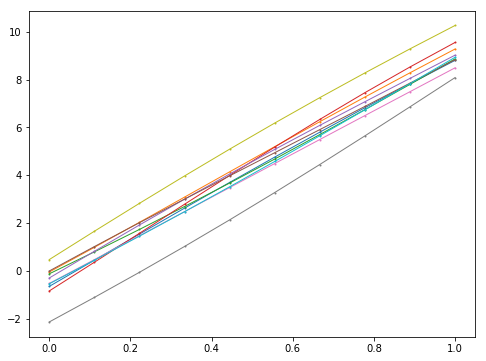

In [6]:
D=10
xs=np.linspace(0,1,D)
plt.figure(figsize=(8,6))
for i in range(10):
    ys=np.random.multivariate_normal(np.arange(xs.shape[0]),k(xs,xs))
    plt.plot(xs,ys,'o-',lw=1,markersize=1)


提高维数

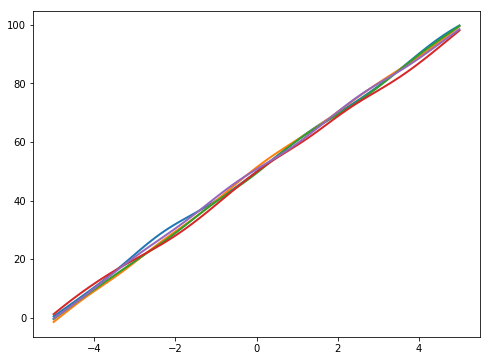

In [7]:
n = 100
xs = np.linspace(-5, 5, n)
K = k(xs, xs)
mu = np.arange(xs.shape[0])
plt.figure(figsize=(8,6))
for i in range(5):
    ys = np.random.multivariate_normal(mu, K)
    plt.plot(xs, ys, linewidth=2)

## 高斯过程预测

假设$0.03X^5+0.2x^4-0.1x^3-2.4x^2-2.5x+6$

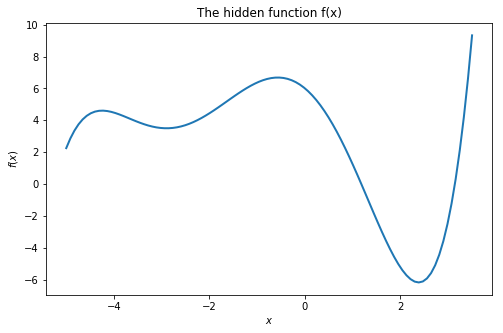

In [8]:
# coefs[i] is the coefficient of x^i
coefs = [6, -2.5, -2.4, -0.1, 0.2, 0.03]

def f(x):
    total = 0
    for exp, coef in enumerate(coefs):
        total += coef * (x ** exp)
    return total

xs = np.linspace(-5.0, 3.5, 100)
ys = f(xs)

fig=plt.figure(figsize=(8,5))
plt.plot(xs,ys,lw=2)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("The hidden function f(x)")

In [9]:
x_obs=np.array([-4.,-1.5,0.,1.5,2.5,2.7])
y_obs=f(x_obs)
x_plot=np.linspace(-5,4,80)
y_plot=f(x_plot)

In [10]:
#计算新的协方差矩阵
K = k(x_obs, x_obs)
K_s = k(x_obs, x_plot)
K_ss = k(x_plot, x_plot)

K_sTKinv = np.matmul(K_s.T, np.linalg.pinv(K))

mu_s = m(x_plot) + np.matmul(K_sTKinv, y_obs - m(x_obs))
Sigma_s = K_ss - np.matmul(K_sTKinv, K_s)

高斯过程中，每个随机变量的方差中会包含不确定性，而矩阵中第i个随机变量的协方差是Σ∗ii，也就是矩阵Σ∗的一个对角元素，所以在这里，我们得到样本的标准差为±2。

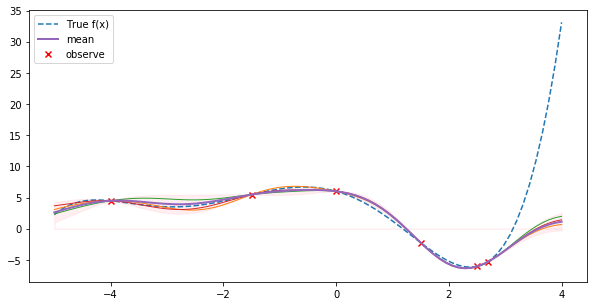

In [13]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_plot,y_plot,'--',label="True f(x)")
plt.scatter(x_obs,y_obs,marker='x',c='red',label="observe")
stds = np.sqrt(Sigma_s.diagonal())
err_xs = np.concatenate((x_plot, np.flip(x_plot, 0)))
err_ys = np.concatenate((mu_s + 2 * stds, np.flip(mu_s - 2 * stds, 0)))
plt.fill_between(err_xs,err_ys,alpha=0.25,color="pink")

for i in range(3):
    y_s=np.random.multivariate_normal(mu_s,Sigma_s)
    plt.plot(x_plot,y_s,lw=1)
plt.plot(x_plot,mu_s,lw=2,label="mean")
plt.legend()

回想一下Ridge回归
$$w=\mathop{argmin}_{w\in\mathbb R^d}\lVert t-\Phi w\lVert^2_2+\frac{1}{2}\lVert\lambda\lVert^2$$
令$$\Phi\Phi^T=k^T,C_N^{-1}=\Phi\Phi^T+\frac{\lambda^2}{2}$$
ridge回归是一种最最最最简单的高斯过程回归，核函数就是简单的点积.

## 6.4.3超参数的学习
现在我们从数据中中推断预测时使用的核的超参数的值，考虑一个广泛使用的Sqared Exponential kernel：
$$k(x_n,x_m)=\theta_0exp\{-\frac{\theta_1}{2}\lVert x_n-x_m\lVert^2\}+\theta_2+\theta_3x_n^Tx_m$$
那么高斯过程的对数似然函数:$$lnp(t|\theta)=-\frac{1}{2}ln|C_N|-\frac{1}{2}t^TC_N^{-1}t-\frac{N}{2}ln(2\pi)$$
对$\theta|$求导就有:
$$\frac{\partial}{\partial\theta_i}lnp(t|\theta)=-\frac{1}{2}Tr(C_N^{-1}\frac{\partial C_N}{\partial \theta_i})+\frac{1}{2}t^TC_N^{-1}\frac{\partial C_N}{\partial \theta_i}C_N^{-1}t$$

In [15]:
def create_toy_data(func, n=10, std=1., domain=[0., 1.]):
    x = np.linspace(domain[0], domain[1], n)
    t = func(x) + np.random.normal(scale=std, size=n)
    return x, t

def sinusoidal(x):
        return np.sin(2 * np.pi * x)

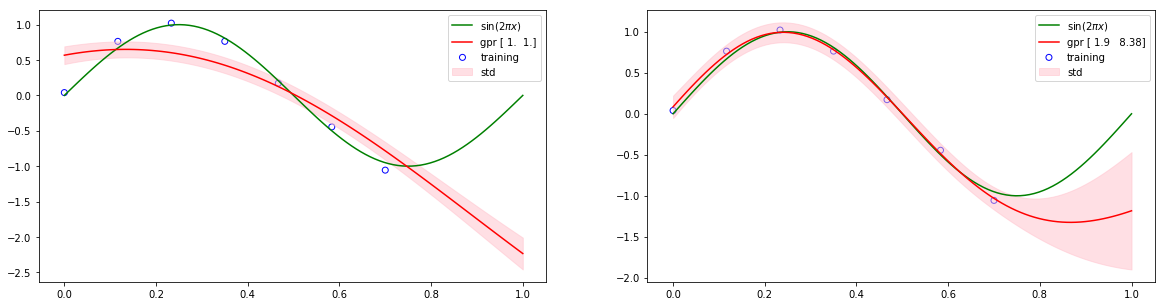

In [16]:
x_train, y_train = create_toy_data(sinusoidal, n=7, std=0.1, domain=[0., 0.7])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model = GaussianProcessRegressor(kernel=RBF(np.array([1., 1.])), beta=100)
model.fit(x_train, y_train)
y, y_std = model.predict(x, with_error=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, y, color="r", label="gpr {}".format(model.kernel.params))
plt.fill_between(x, y - y_std, y + y_std, alpha=0.5, color="pink", label="std")
plt.legend()

plt.subplot(1, 2, 2)
model.fit(x_train, y_train, iter_max=100)
y, y_std = model.predict(x, with_error=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, y, color="r", label="gpr {}".format(np.round(model.kernel.params, 2)))
plt.fill_between(x, y - y_std, y + y_std, alpha=0.5, color="pink", label="std")
plt.legend()
plt.show()

## 6.4.5 基于分类的高斯过程

目标变量$t\in{0,1}$,服从伯努力分布$p(t|a)=\sigma(a)^t(1-\sigma(a))^(1-t)$,需要确定预测分布$p(t_{N+1}|t)$,引入高斯先验:$p(a_{N+1})=\mathcal N(a_{N+1}|0,C_{N+1})$

$$p(t_{N+1}=1|t_N)=\int p(t_{N+1}=1|a_{N+1})p(a_{N+1}|t_N)da_{N+!}$$
求解方法:变分法，期望传播，Laplace近似。